In [257]:
import pickle
import pandas as pd
with open('lichess_data-22-01', 'rb') as f:
    data_22 = pickle.load(f)
    (players_e4_22, players_d4_22, players_elo_22) = data_22
    
with open('lichess_data-23-01', 'rb') as f:
    data_23 = pickle.load(f)
    (players_e4_23, players_d4_23, players_elo_23) = data_23

In [258]:
len(players_e4_22['blitz'])

950477

In [259]:
len(players_d4_22['blitz'])

477755

In [260]:
#only keep players who played in both 2022 and 2023
for mode in ['rapid', 'blitz']:
    for player in [key for key in list(players_elo_22[mode].keys()) + list(players_elo_23[mode].keys())]:
        if not (player in players_elo_22[mode] and player in players_elo_23[mode]):
            players_elo_22[mode].pop(player, None)
            players_elo_23[mode].pop(player, None)
            players_e4_22[mode].pop(player, None)
            players_d4_22[mode].pop(player, None)
            players_e4_23[mode].pop(player, None)
            players_d4_23[mode].pop(player, None)

In [261]:
#only keep players who did e4 or d4, not both
for mode in ['rapid', 'blitz']:
    e4_players = list(players_e4_22[mode].keys()) + list(players_e4_23[mode].keys())
    for player in e4_players:
        if (player in players_d4_22[mode]) or (player in players_d4_23[mode]):
            players_elo_22[mode].pop(player, None)
            players_elo_23[mode].pop(player, None)
            players_e4_22[mode].pop(player, None)
            players_d4_22[mode].pop(player, None)
            players_e4_23[mode].pop(player, None)
            players_d4_23[mode].pop(player, None)

In [262]:
len(players_e4_22['blitz'])

217088

In [263]:
len(players_d4_22['blitz'])

28949

In [264]:
def sort_elo(pair):
    return int(pair[1])


e4_elo_22 =  {"blitz":[], 'rapid':[]}
e4_elo_23 = {"blitz":[], 'rapid':[]}
d4_elo_22 =  {"blitz":[], 'rapid':[]}
d4_elo_23 = {"blitz":[], 'rapid':[]}
d4_players = {"blitz":[], 'rapid':[]}
players = {"blitz":[], 'rapid':[]}
for mode in ['rapid', 'blitz']:
    players[mode] = sorted(players_elo_22[mode].items(), key=sort_elo)
    for (player, rating) in players[mode]:
        if int(rating) > 1300:
            break
            # pass
        if player in players_e4_22[mode].keys():
            e4_elo_22[mode].append(int(players_elo_22[mode][player]))
            e4_elo_23[mode].append(int(players_elo_23[mode][player]))
        elif player in players_d4_22[mode].keys():
            d4_elo_22[mode].append(int(players_elo_22[mode][player]))
            d4_elo_23[mode].append(int(players_elo_23[mode][player]))      
        




In [265]:
bins = {"blitz":[], 'rapid':[]}

for mode in ['rapid', 'blitz']:
    bins[mode] = range(min(e4_elo_23[mode]), max(e4_elo_23[mode]), 50)

In [266]:
# print(len(e4_elo_22['rapid']), len(d4_elo_22['rapid']))
print(len(d4_elo_22['rapid'])/ len(e4_elo_22['rapid']), len(players_d4_22['rapid'])/len(players_e4_22['rapid']))

0.12126055241373658 0.17755705596785892


In [267]:
bins=list(range(600,1800, 50))
mode = 'rapid'
df = pd.DataFrame({'e4_elo_22':e4_elo_22[mode], 'e4_elo_23':e4_elo_23[mode]})

df['bins'] = pd.cut(e4_elo_22[mode], bins=bins,  right=False, include_lowest=True)


In [268]:
df2 = pd.DataFrame({'d4_elo_22':d4_elo_22[mode], 'd4_elo_23':d4_elo_23[mode]})

df2['bins'] = pd.cut(d4_elo_22[mode], bins=bins,  right=False, include_lowest=True)

In [269]:
df = pd.merge(df.groupby('bins').mean(), df2.groupby('bins').mean(), on='bins')


In [270]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (25, 10)

df['groups'] = [str(v)[1:-1].replace(", ", "-") for v in df.index]


In [271]:
from scipy.stats import ttest_ind
A = df['e4_elo_23'] - df['e4_elo_22']
B = df['d4_elo_23'] - df['d4_elo_22']
# B = A - 20
df['e4_improvement'] = A
df['d4_improvement'] = B



In [272]:
from scipy.stats import ttest_ind

A = np.array(e4_elo_23[mode])  - np.array(e4_elo_22[mode]) 
B = np.array(d4_elo_23[mode])  - np.array(d4_elo_22[mode]) 

ttest_ind(A, B)

Ttest_indResult(statistic=-1.7003586262460226, pvalue=0.08907485455437082)

In [273]:
print(A.mean(), B.mean())

80.90939267273174 87.1007096992227


Text(0, 0.5, 'Rating change in 2023, rapid')

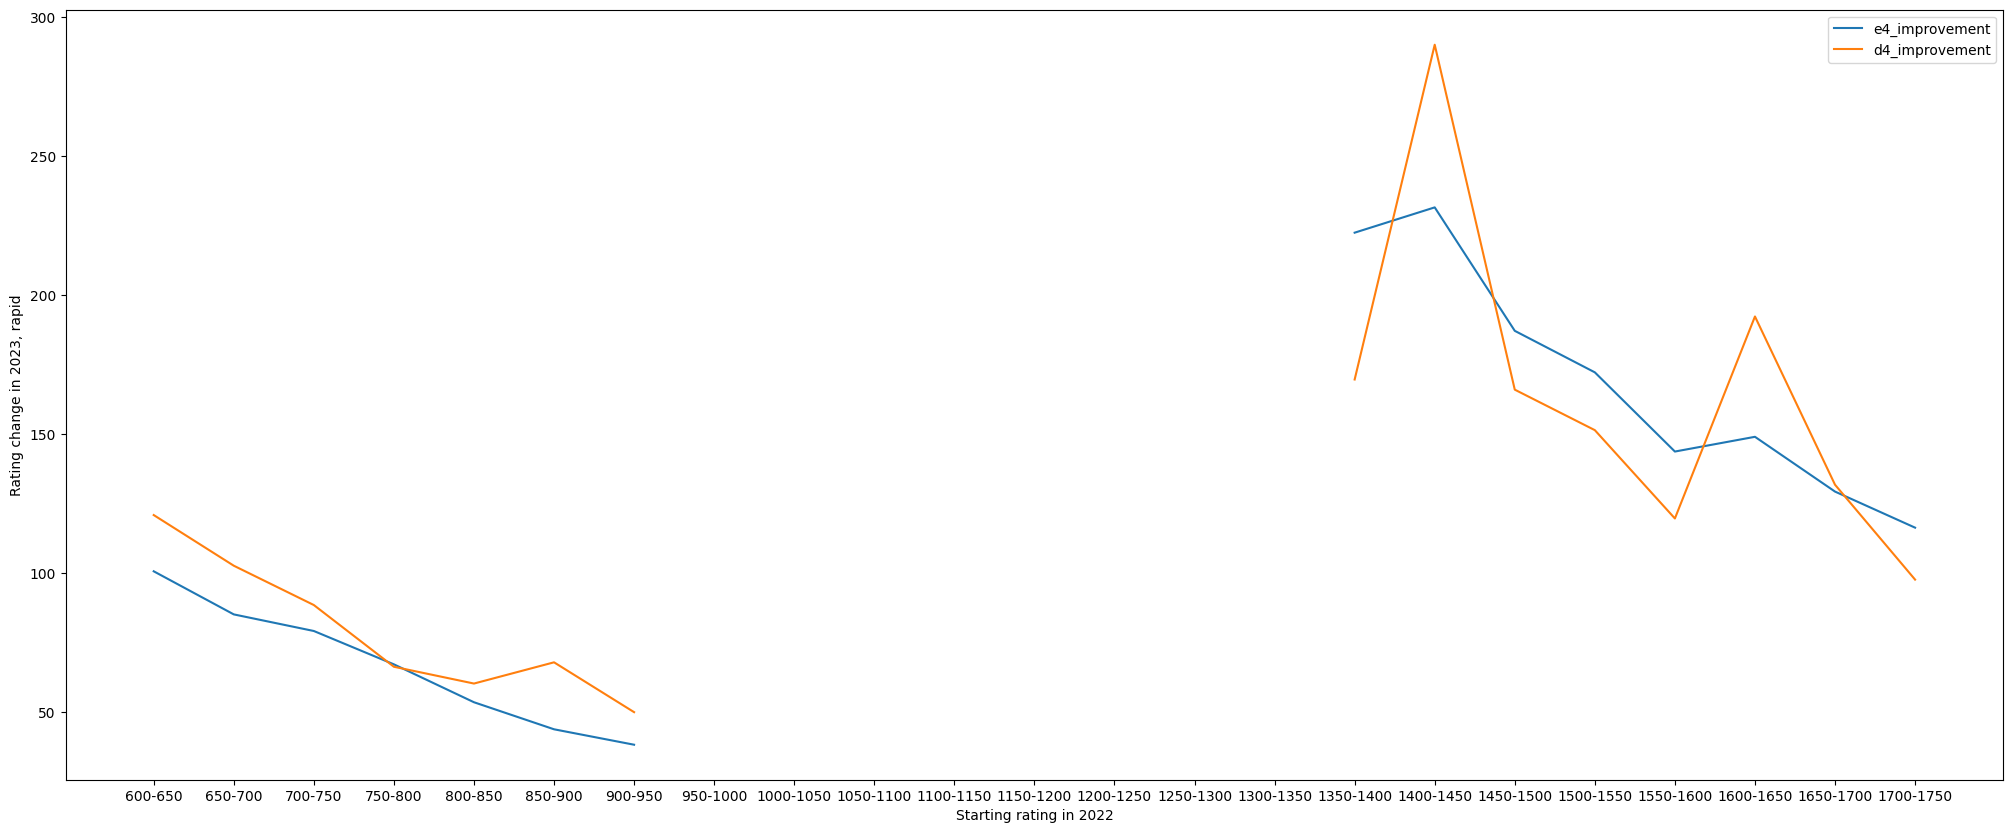

In [274]:
df[['e4_improvement', 'd4_improvement', 'groups']].groupby('groups').mean().plot()
plt.xticks(range(len(df.index)), df.groups)
plt.xlabel("Starting rating in 2022")
plt.ylabel(f'Rating change in 2023, {mode}')
